# Optimización de Portafolio de Inversión

**Integrantes**:

1. Miguel de Jesús Aguirre Orozco

2. Berlín Preciado Escalera

3. Miriam Eunice Rosas Medellín

**Profesor**: Alberto Arjona

**Materia**: Simulación Matemática

**Ciclo**: Verano 2019

**Carrera**: Ingeniería Financiera

**Escuela**: Departamento de Matemáticas y Física (DMAF) del Instituto Tecnológico y de Estudios Superiores de Occidente (ITESO), A.C.

## Primera Parte: Selección de Activos

Utilizamos el inspector de acciones de Yahoo Finanzas para ver cual es el top 10 de firmas con mayor rendimiento en la región de México. Las empresas que resulten las someteremos a una simulación de probabilidad precio umbral para descartar la mitad y finalmente poder seleccionar las cinco acciones en específico que contendrá nuestra cartera de inversión. La lista es la siguiente.

1. Cigna Corporation (7.44%)
2. Volkswagen AG (7.39%)
3. Itaú Unibanco Holding S.A. (5.21%)
4. Nemak, S. A. B. de C. V. (4.48%)
5. Ross Stores, Inc. (4.18%)
6. Caterpillar Inc. (3.93%)
7. Nokia Corporation (3.57%)
8. Walmart Inc.(3.49%)
9. Controladora Vuela Compañía de Aviación, S.A.B. de C.V. (3.48%)
10. Leidos Holdings, Inc. (3.43%)

Como queremos que nuestro portafolio de inversión tenga un vencimiento de cinco años, el análisis de la probabilidad precio umbral la realizaremos con los precios históricos de los últimos cinco años; es decir, desde el principio del 2013 hasta el final del 2018. Esto con el objetivo de evitar tendencias a corto plazo que podrían aparecer si sólo utilizamos los precios de uno o dos años. Adicionalmente es pertinente mencionar que las cotizaciones utilizadas están en la divisa USD. 

**Nota**: Tuvimos que descartar dos de las empresas que se encontraban en el top 10 y reemplazarlas por el siguiente par debido a que por alguna razón, el código presentaba un error en las fechas de cierre que no pudimos remediar. Estas empresas eran INFOSYS LTD y Humana Inc.

In [1]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
def get_historical_closes(ticker,start_date,end_date=None):
    closes=web.YahooDailyReader(ticker,start_date,end_date).read()
    return pd.DataFrame(closes.loc[:,"Adj Close"])
def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1)).dropna()
def daily_ret_sim(mu,sigma,ndays,ntraj,start_date):
    dates=pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigma*np.random.randn(ndays,ntraj)+mu,index=dates)

### Cigna Corporation

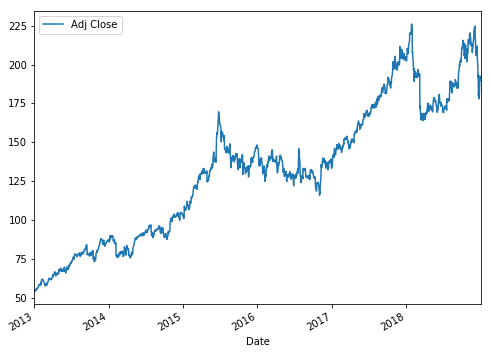

In [2]:
ticker="CI"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [3]:
closes.iloc[-1]

Adj Close    189.873627
Name: 2018-12-31 00:00:00, dtype: float64

In [4]:
daily_returns=calc_daily_returns(closes)

In [5]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

In [6]:
ndays=1826
ntraj=10
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)

In [7]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9
2019-01-01,189.737740,191.909449,194.615055,186.041744,187.073352,187.184229,188.126839,196.528194,188.844275,196.433102
2019-01-02,181.984255,189.198249,194.306220,183.160990,184.190887,188.189680,190.429657,198.881135,189.554876,196.879876
2019-01-03,184.049626,187.208802,192.169704,183.658298,183.470596,189.359662,193.071572,197.720575,190.307042,205.197149
2019-01-04,182.924382,188.886986,194.716526,189.323734,183.468985,193.305770,193.043852,202.360651,192.066372,202.353176
2019-01-05,180.552215,190.744480,190.740154,190.824326,179.396552,195.473882,195.875796,206.634990,199.483086,201.951993
2019-01-06,177.450367,188.587898,195.041521,191.331240,181.494633,189.556734,196.852416,209.107585,199.395226,197.166516
2019-01-07,182.258767,190.624217,194.307267,195.494000,183.021974,187.520701,195.696547,209.703475,196.259338,195.749555
2019-01-08,187.314613,193.455315,196.644886,197.438683,181.087514,183.490308,193.587658,209.680995,199.250344,198.322470
2019-01-09,187.744526,192.854305,193.765895,193.601805,182.601322,184.042506,189.764580,209.848082,202.234112,200.030482
2019-01-10,185.094299,195.447111,193.121608,194.716404,182.784527,183.901084,190.396277,212.134479,200.839069,200.584098


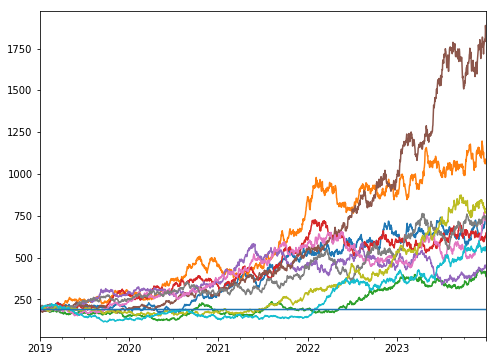

In [8]:
K=189.873627
dates=pd.date_range("20190101",periods=ndays)
strike=pd.DataFrame({"Strike":K*np.ones(ndays)},index=dates)
simul=pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

### Volkswagen AG

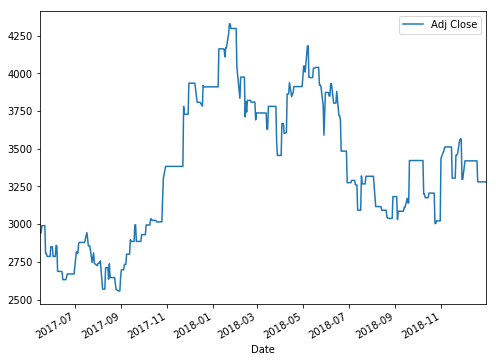

In [9]:
ticker="VOW3N.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [10]:
closes.iloc[-1]

Adj Close    3280.551025
Name: 2018-12-31 00:00:00, dtype: float64

In [11]:
daily_returns=calc_daily_returns(closes)

In [12]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

In [13]:
ndays=1826
ntraj=10
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)

In [14]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9
2019-01-01,3226.249756,3268.597642,3343.143401,3219.274053,3352.172227,3338.236576,3371.620427,3312.510739,3398.986182,3388.592132
2019-01-02,3096.951780,3234.295859,3280.053148,3327.481536,3354.281601,3463.927664,3278.358853,3385.797431,3292.247198,3379.097762
2019-01-03,3076.001317,3177.903473,3349.367160,3297.910292,3334.513102,3510.269049,3281.200356,3334.040107,3294.380703,3344.875598
2019-01-04,3003.137721,3115.324400,3409.740545,3284.891662,3322.316559,3456.399986,3397.608834,3339.921285,3305.934040,3343.129123
2019-01-05,2999.195835,3115.738343,3384.089393,3210.942020,3303.976578,3499.386242,3544.670400,3315.806904,3216.519586,3380.060244
2019-01-06,3017.203698,3166.234314,3405.920220,3208.261533,3349.916558,3377.768389,3626.244009,3287.527994,3261.818658,3576.748367
2019-01-07,3024.109253,3198.775257,3389.212576,3161.483675,3385.126697,3330.164418,3568.117091,3264.105556,3250.965371,3637.565530
2019-01-08,3121.344655,3256.467210,3438.790480,3152.293131,3349.333097,3327.498905,3559.546173,3353.173088,3227.340149,3655.026959
2019-01-09,2955.696867,3261.153831,3411.154716,3133.850264,3447.192187,3328.360831,3506.899664,3429.752274,3229.595496,3603.714729
2019-01-10,3081.090647,3289.158892,3352.903110,3033.615520,3498.660734,3317.197811,3426.686389,3494.395923,3226.154546,3552.326485


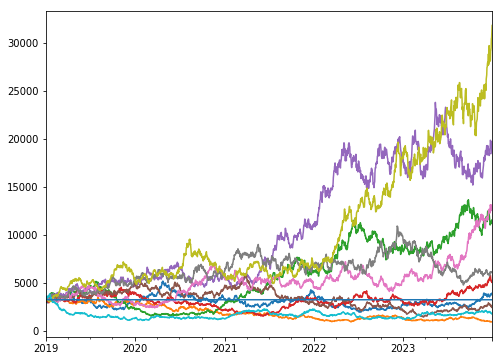

In [15]:
K=3280.551025
dates=pd.date_range("20190101",periods=ndays)
strike=pd.DataFrame({"Strike":K*np.ones(ndays)},index=dates)
simul=pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

### Itaú Unibanco Holding S.A.

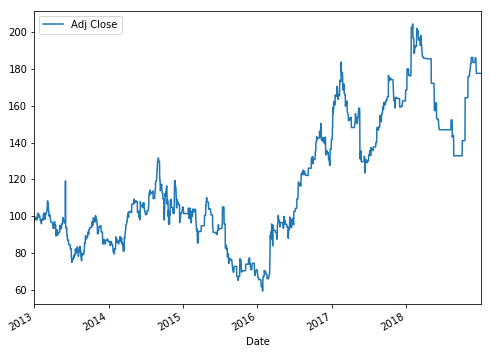

In [16]:
ticker="ITUBN.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [17]:
closes.iloc[-1]

Adj Close    177.729767
Name: 2018-12-31 00:00:00, dtype: float64

In [18]:
daily_returns=calc_daily_returns(closes)

In [19]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

In [20]:
ndays=1826
ntraj=10
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)

In [21]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9
2019-01-01,176.720852,176.306343,173.929966,171.889342,169.387068,175.034924,174.128237,173.886311,173.135515,181.371911
2019-01-02,183.578230,175.930596,173.978025,174.231162,169.075679,171.347416,167.407490,168.053637,171.588147,177.416203
2019-01-03,178.919149,174.192993,169.419846,171.968868,164.658788,177.454157,167.595965,169.526709,167.543195,176.004981
2019-01-04,188.800194,175.946904,171.552177,170.219946,160.694746,180.285563,164.627897,165.655964,165.529160,178.704990
2019-01-05,183.521292,172.254621,172.038704,171.823746,162.994492,181.930491,163.554302,165.223704,161.969484,179.731406
2019-01-06,194.839355,168.798116,175.091557,176.255035,164.060000,190.835436,165.598122,168.262312,163.996151,185.573837
2019-01-07,192.298150,168.245465,179.315754,178.063555,164.997345,193.014593,160.206495,171.327955,162.164960,187.702214
2019-01-08,197.442523,174.154574,182.032972,182.161726,165.064064,196.169204,168.141960,170.804494,160.755390,192.280532
2019-01-09,203.633206,176.116517,180.707890,183.981898,169.933109,196.759993,170.962229,168.336735,163.990420,188.046719
2019-01-10,203.485989,169.759284,179.288874,181.477458,165.518626,195.914415,172.253991,164.960409,155.414739,181.966187


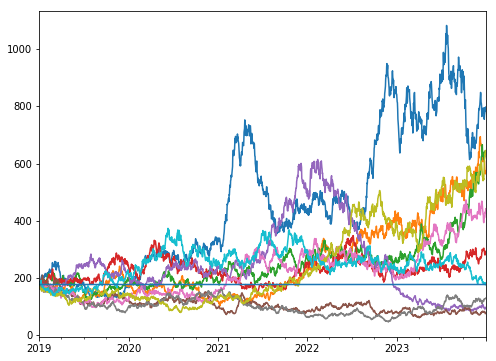

In [22]:
K=177.729767
dates=pd.date_range("20190101",periods=ndays)
strike=pd.DataFrame({"Strike":K*np.ones(ndays)},index=dates)
simul=pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

### Nemak, S. A. B. de C. V.

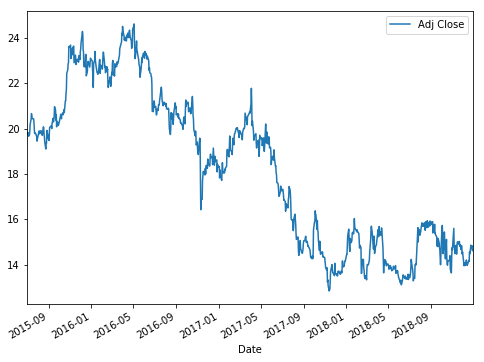

In [23]:
ticker="NEMAKA.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [24]:
closes.iloc[-1]

Adj Close    14.620543
Name: 2018-12-31 00:00:00, dtype: float64

In [25]:
daily_returns=calc_daily_returns(closes)

In [26]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

In [27]:
ndays=1826
ntraj=10
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)

In [28]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9
2019-01-01,14.463086,14.970760,14.708196,14.754480,14.651685,14.556946,14.811296,14.898611,14.198883,14.905553
2019-01-02,14.313777,14.879191,14.431404,14.252706,14.231071,14.607667,14.784519,14.896171,14.518575,14.850779
2019-01-03,14.330914,15.088200,14.250249,14.340103,14.396730,14.446114,14.918029,14.872371,14.177818,15.012910
2019-01-04,14.396367,14.993781,14.749841,14.753131,14.185600,14.501556,14.124112,14.806129,14.160653,15.471298
2019-01-05,14.332865,14.548926,14.841655,14.653965,14.145565,14.556418,14.139727,14.619876,14.265878,15.315194
2019-01-06,14.704827,14.701066,14.454072,14.454624,14.279817,14.199656,14.331065,14.708043,14.422928,15.013272
2019-01-07,15.141650,14.666704,14.605013,14.845814,14.218950,14.551240,14.230751,14.510214,14.425266,14.948754
2019-01-08,15.272464,14.324888,14.725621,14.550210,13.801744,14.472992,13.829208,14.532155,14.349994,14.845337
2019-01-09,15.123915,14.171625,14.818644,14.447108,13.741603,14.672913,13.806973,14.270398,14.814535,14.113288
2019-01-10,15.100431,14.091403,14.610152,14.396118,13.720627,14.909146,13.351744,14.270216,14.882264,14.187516


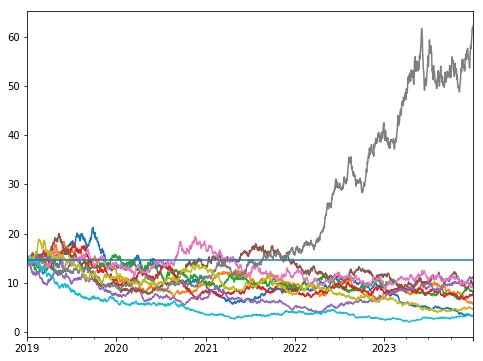

In [29]:
K=14.620543
dates=pd.date_range("20190101",periods=ndays)
strike=pd.DataFrame({"Strike":K*np.ones(ndays)},index=dates)
simul=pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

### Ross Stores, Inc.

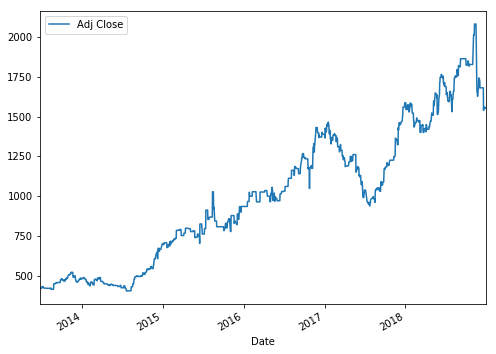

In [30]:
ticker="ROST.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [31]:
closes.iloc[-1]

Adj Close    1551.430054
Name: 2018-12-31 00:00:00, dtype: float64

In [32]:
daily_returns=calc_daily_returns(closes)

In [33]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

In [34]:
ndays=1826
ntraj=10
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)

In [35]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9
2019-01-01,1579.910819,1568.213129,1564.095772,1540.325424,1557.719525,1586.032250,1523.269759,1514.835052,1529.840266,1538.393158
2019-01-02,1602.282493,1563.282892,1580.506514,1512.173067,1525.439218,1588.538690,1569.319365,1503.701253,1508.314451,1539.979801
2019-01-03,1681.745921,1589.163541,1545.107447,1491.896116,1549.382273,1611.109421,1598.658219,1489.812296,1467.889406,1534.267413
2019-01-04,1687.900234,1554.601945,1561.700698,1512.393860,1538.544527,1598.091496,1601.287699,1433.274729,1489.369542,1498.151578
2019-01-05,1631.059751,1525.889269,1582.363056,1484.434849,1488.717455,1625.116954,1564.344558,1483.159628,1520.700790,1490.568506
2019-01-06,1700.025513,1513.366894,1554.910153,1515.874260,1479.587842,1711.880506,1573.466956,1449.033462,1530.404546,1524.320850
2019-01-07,1759.410324,1494.709865,1567.691031,1523.590673,1494.092072,1737.043241,1612.119288,1433.143617,1538.989826,1505.842062
2019-01-08,1699.938244,1484.187047,1563.392271,1523.743800,1506.237619,1750.004259,1591.870064,1425.444452,1513.636710,1485.589716
2019-01-09,1686.135730,1493.712044,1567.656892,1467.446623,1498.646093,1774.423158,1588.828514,1413.713967,1508.626626,1457.579063
2019-01-10,1636.715941,1451.383849,1549.155044,1457.010337,1480.009808,1795.925842,1609.467111,1392.949262,1492.864601,1475.861831


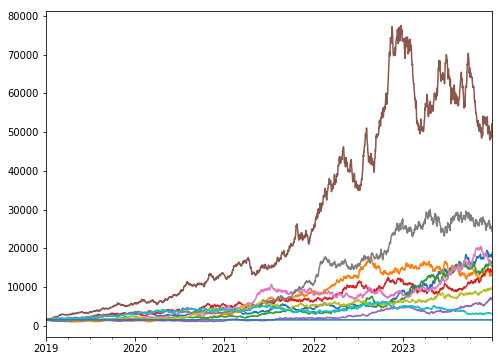

In [36]:
K=1551.430054
dates=pd.date_range("20190101",periods=ndays)
strike=pd.DataFrame({"Strike":K*np.ones(ndays)},index=dates)
simul=pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

### Caterpillar Inc.

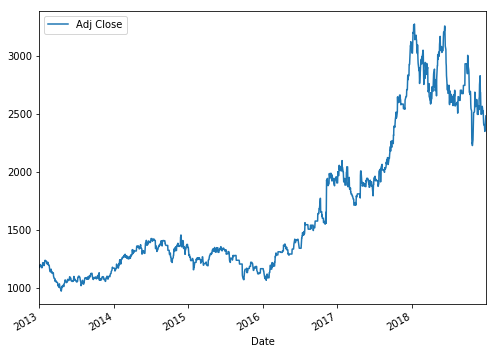

In [37]:
ticker="CAT.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [38]:
closes.iloc[-1]

Adj Close    2483.924072
Name: 2018-12-31 00:00:00, dtype: float64

In [39]:
daily_returns=calc_daily_returns(closes)

In [40]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

In [41]:
ndays=1826
ntraj=10
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)

In [42]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9
2019-01-01,2486.296135,2526.701281,2464.037469,2526.827395,2463.636754,2409.440618,2496.226604,2553.697279,2567.118696,2596.734737
2019-01-02,2480.412068,2490.532265,2482.723513,2492.676300,2469.238884,2410.250555,2426.758873,2520.701659,2523.698088,2555.561653
2019-01-03,2441.818749,2519.784653,2474.435514,2514.722246,2463.407542,2434.364907,2475.367195,2504.832831,2518.303364,2584.885222
2019-01-04,2422.362273,2533.510427,2522.083281,2526.754778,2471.151872,2452.214349,2438.071146,2454.168580,2588.746490,2541.339526
2019-01-05,2445.716000,2510.733887,2472.946154,2563.595485,2512.447055,2389.975429,2404.321071,2430.918672,2601.082486,2540.665954
2019-01-06,2408.263823,2584.214683,2503.849251,2558.060308,2529.307832,2359.083294,2420.621136,2453.557466,2579.451662,2484.905544
2019-01-07,2396.484480,2573.727628,2418.710992,2542.343652,2508.602074,2318.807236,2441.559112,2462.909653,2578.899192,2444.187548
2019-01-08,2369.446458,2630.573060,2409.246756,2537.048697,2500.335800,2272.917159,2527.438418,2461.689952,2541.979377,2423.149179
2019-01-09,2349.519874,2669.033400,2411.181009,2577.434407,2527.449179,2223.857205,2447.441781,2453.215441,2561.116215,2463.331979
2019-01-10,2323.712060,2701.206374,2418.469964,2582.014184,2469.963204,2252.070630,2405.192760,2490.074226,2521.079151,2480.863999


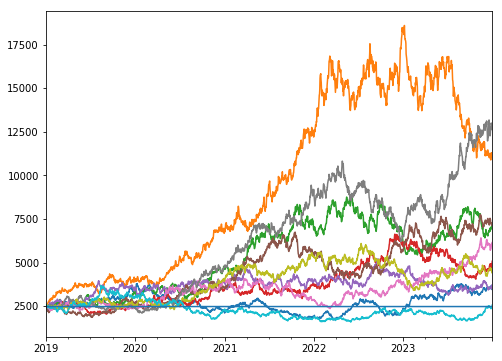

In [43]:
K=2483.924072
dates=pd.date_range("20190101",periods=ndays)
strike=pd.DataFrame({"Strike":K*np.ones(ndays)},index=dates)
simul=pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

### Nokia Corporation

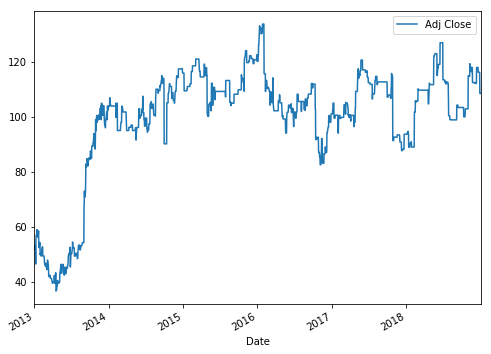

In [44]:
ticker="NOKN.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [45]:
closes.iloc[-1]

Adj Close    108.53614
Name: 2018-12-31 00:00:00, dtype: float64

In [46]:
daily_returns=calc_daily_returns(closes)

In [47]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

In [48]:
ndays=1826
ntraj=10
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)

In [49]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9
2019-01-01,104.363310,107.656465,107.426071,111.069300,109.785548,109.144281,109.534809,110.600165,111.107367,106.328913
2019-01-02,102.825028,98.638806,106.540237,111.552858,108.949167,107.497496,108.039296,108.020832,112.365858,107.453665
2019-01-03,100.631425,97.710886,111.118817,112.343993,108.165392,109.575954,103.347621,112.248667,115.205135,110.395370
2019-01-04,102.988400,97.086462,109.961624,108.412103,107.401161,111.455735,102.883205,116.891946,112.433361,112.101124
2019-01-05,105.302904,98.900360,113.340961,107.299136,109.435467,114.167376,102.962620,119.194204,113.353345,112.684676
2019-01-06,105.264812,101.629705,113.743373,105.259375,110.934798,113.250044,101.255229,119.347906,112.311875,108.716997
2019-01-07,107.596057,104.229775,115.191537,106.664299,111.110688,113.143094,102.222062,120.065896,107.352088,112.553749
2019-01-08,106.065704,102.270378,114.602150,102.984544,112.383799,113.132087,101.804324,121.857655,106.050043,112.957069
2019-01-09,104.762803,105.076001,114.273308,101.413016,115.122161,113.036364,100.632548,117.717590,106.471802,117.579579
2019-01-10,102.545397,106.720765,112.041667,102.223773,114.047191,115.371288,99.582396,118.203649,103.395610,117.867521


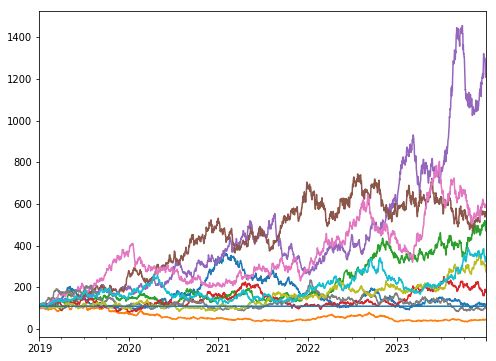

In [50]:
K=108.53614
dates=pd.date_range("20190101",periods=ndays)
strike=pd.DataFrame({"Strike":K*np.ones(ndays)},index=dates)
simul=pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

### Walmart Inc.

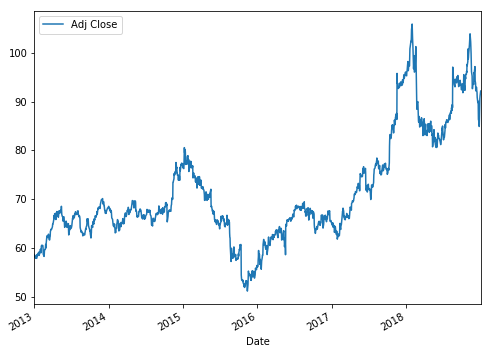

In [51]:
ticker="WMT"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [52]:
closes.iloc[-1]

Adj Close    92.161888
Name: 2018-12-31 00:00:00, dtype: float64

In [53]:
daily_returns=calc_daily_returns(closes)

In [54]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

In [55]:
ndays=1826
ntraj=10
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)

In [56]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9
2019-01-01,91.748586,91.787029,92.195284,91.179264,92.721014,93.591113,91.993098,92.090638,91.580009,92.283979
2019-01-02,91.627431,90.832939,92.339473,90.251963,91.639707,92.829408,91.293409,90.394611,92.982965,92.185997
2019-01-03,92.546678,89.929547,92.805355,88.160231,92.587236,91.442823,91.535231,90.442449,92.288628,91.949653
2019-01-04,91.618061,90.322363,92.244756,88.109637,92.357208,90.621669,90.521968,90.794461,92.829410,90.077398
2019-01-05,90.700746,90.451941,93.170089,88.077105,92.938053,91.225485,91.114476,91.482178,93.705679,89.165663
2019-01-06,92.078053,88.390653,92.974283,88.699848,91.466251,92.622405,89.444916,93.583158,92.282833,87.307916
2019-01-07,91.955731,88.688542,91.418825,88.506967,89.998532,91.596596,88.846700,92.947584,90.475502,87.025756
2019-01-08,89.683720,88.830169,89.824921,88.909226,89.527003,93.628598,90.085492,92.047386,90.492523,86.178695
2019-01-09,92.242028,89.199759,92.366764,87.147052,90.492313,95.615037,91.771669,94.839240,91.410123,86.559607
2019-01-10,91.873070,89.138962,92.793135,89.765606,90.645739,95.741741,91.583290,93.709884,91.176725,87.184927


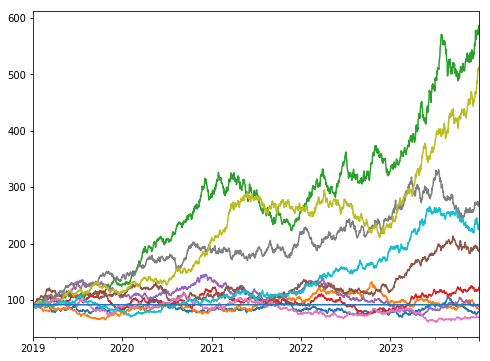

In [57]:
K=92.161888
dates=pd.date_range("20190101",periods=ndays)
strike=pd.DataFrame({"Strike":K*np.ones(ndays)},index=dates)
simul=pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

### Controladora Vuela Compañía de Aviación, S.A.B. de C.V.

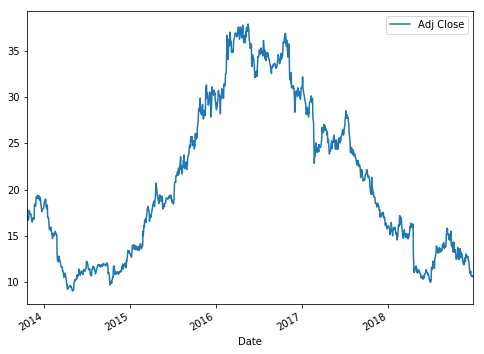

In [58]:
ticker="VOLARA.MX"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [59]:
closes.iloc[-1]

Adj Close    10.48
Name: 2018-12-31 00:00:00, dtype: float64

In [60]:
daily_returns=calc_daily_returns(closes)

In [61]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

In [62]:
ndays=1826
ntraj=10
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)

In [63]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9
2019-01-01,10.301329,10.792567,10.632471,9.996503,10.689013,10.274824,10.384862,10.541732,10.277067,10.634834
2019-01-02,10.322897,10.985693,10.440092,10.135800,10.849558,9.880524,9.910202,10.685721,10.074965,10.710924
2019-01-03,10.436005,10.900056,10.731107,10.126797,11.088024,10.085522,9.746282,10.350600,10.299934,10.501884
2019-01-04,10.101967,10.846006,11.388227,10.346443,11.161636,10.000013,9.702336,10.066495,10.437319,10.122984
2019-01-05,10.147124,10.410336,11.564586,10.369905,11.505844,10.553298,9.716262,10.422432,10.483380,10.186355
2019-01-06,9.923360,10.079402,11.538917,10.707678,11.538668,10.469368,9.595931,10.445115,10.443549,10.224700
2019-01-07,10.083725,9.854026,11.272472,11.149176,11.655208,10.801113,9.500284,10.996429,10.275728,10.584476
2019-01-08,9.823501,10.346415,11.280547,10.459578,11.639339,10.413319,9.099172,10.560797,10.300733,11.000096
2019-01-09,9.630192,10.315098,10.925290,10.681768,11.876562,10.597575,9.302963,10.401719,10.340868,11.419704
2019-01-10,9.937700,10.293323,10.617645,10.999903,11.973527,10.592347,9.329285,10.571970,10.640487,11.430132


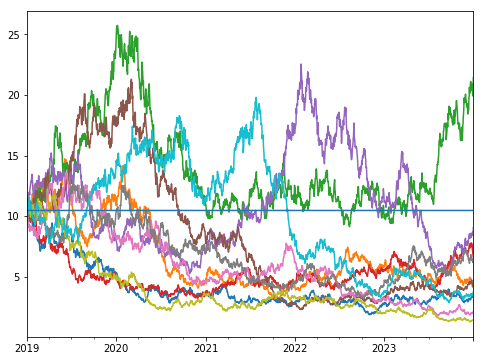

In [64]:
K=10.48
dates=pd.date_range("20190101",periods=ndays)
strike=pd.DataFrame({"Strike":K*np.ones(ndays)},index=dates)
simul=pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

### Leidos Holdings, Inc

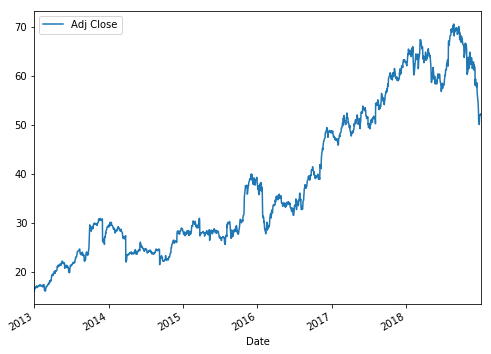

In [65]:
ticker="LDOS"
start_date="2013-01-01"
end_date="2018-12-31"
closes=get_historical_closes(ticker,start_date,end_date)
closes.plot(figsize=(8,6));

In [66]:
closes.iloc[-1]

Adj Close    52.241898
Name: 2018-12-31 00:00:00, dtype: float64

In [67]:
daily_returns=calc_daily_returns(closes)

In [68]:
mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

In [69]:
ndays=1826
ntraj=10
start_date="2019-01-01"
simret=daily_ret_sim(mu,sigma,ndays,ntraj,start_date)

In [70]:
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())
simdata

,0,1,2,3,4,5,6,7,8,9
2019-01-01,52.069079,52.866442,51.652671,52.627892,52.057624,51.312416,53.033123,52.692914,51.314832,52.449314
2019-01-02,53.610790,53.069659,51.030808,52.276573,50.934809,51.469032,54.613190,51.963613,51.335765,54.474019
2019-01-03,51.861332,52.706117,51.524998,52.924904,51.419628,51.077196,54.786393,51.229542,53.702716,54.159422
2019-01-04,51.770829,52.492308,52.884285,53.943302,51.664846,52.011430,53.776343,51.632969,53.611212,54.631429
2019-01-05,53.311581,53.676266,54.877055,52.712007,51.100250,51.986135,52.011920,52.113928,54.007193,54.353516
2019-01-06,54.174062,53.217135,54.326049,53.182292,51.899693,52.831687,51.557385,52.421021,53.479381,53.608572
2019-01-07,54.049357,53.013714,53.252696,52.476263,53.143424,53.973338,51.676054,51.068157,54.788627,52.554328
2019-01-08,54.746300,54.148463,53.145320,53.348282,53.072083,53.656259,50.574498,51.326661,55.968969,52.283894
2019-01-09,54.413445,53.124981,53.713324,51.810964,54.275019,53.886730,50.455553,51.274300,55.439671,53.088420
2019-01-10,53.576190,54.670857,52.944156,51.954681,55.637253,53.195767,50.273411,51.894233,56.418707,53.917995


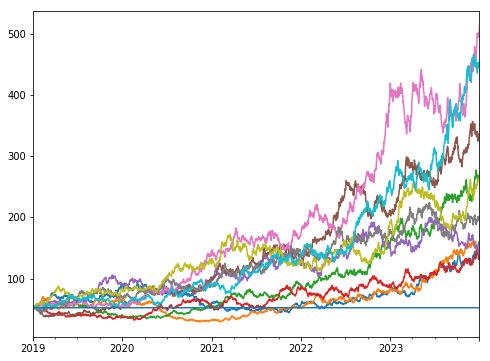

In [71]:
K=52.241898
dates=pd.date_range("20190101",periods=ndays)
strike=pd.DataFrame({"Strike":K*np.ones(ndays)},index=dates)
simul=pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

Ahora, hacemos el recuento de los escenarios en donde cada una de las acciones sobrepasó o quedó bajo su respectivo umbral (el cual es el precio ajustado de cierre del 2018).

1. **Subió** 10 y **bajó** 0
2. **Subió** 8 y **bajó** 2
3. **Subió** 6 y **bajó** 4
4. **Subió** 4 y **bajó** 6
5. **Subió** 9 y **bajó** 1
6. **Subió** 9 y **bajó** 1
7. **Subió** 8 y **bajó** 2
8. **Subió** 10 y **bajó** 0
9. **Subió** 4 y **bajó** 6
10. **Subió** 10 y **bajó** 0

Así, las firmas que descartamos para nuestro portafolio de inversión son la 2 (**Volkswagen AG**), 3 (**Itaú Unibanco Holding S.A.**), 4 (**Nemak, S. A. B. de C. V.**), 7 (**Nokia Corporation**) y 9 (**Controladora Vuela Compañía de Aviación, S.A.B. de C.V.**) debido a que son las que más escenarios bajistas presentaron en la simulación. Entonces la selección de activos queda definida; la lista de acciones que conformarán el portafolio son las siguientes:

1. Cigna Corporation (7.44%)
2. Ross Stores, Inc. (4.18%)
3. Caterpillar Inc. (3.93%)
4. Walmart Inc.(3.49%)
5. Leidos Holdings, Inc. (3.43%)

#### Fuente

https://es.finance.yahoo.com/screener/a288df9d-4ab8-4c26-ae31-cf0f95142d06